In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("weatherAUS-noDir.csv")

In [ ]:
df = df.sample(frac=1)

In [ ]:
x = list(df.columns).index("RainTomorrow")
ls= list(df.columns[:x])+list(df.columns[x+1:])
ls.append("RainTomorrow")
df = df[ls]
df.head()
del x

In [ ]:
X=df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Default parameters SVM

In [ ]:
# svc=SVC() #Default hyperparameters
# svc.fit(X_train,y_train)
# y_pred=svc.predict(X_test)
# print('Accuracy Score:')
# print(metrics.accuracy_score(y_test,y_pred))
# print('Precision Score:')
# print(metrics.precision_score(y_test,y_pred))

In [ ]:
svc = SVC()
scores = cross_validate(svc, X, y, cv=10, scoring='precision')
print(f"SVM with 'linear' kernel has a mean precision of {scores['test_score'].mean()}")

In [ ]:
svc = SVC(kernel='linear')
scores = cross_validate(svc, X, y, cv=10, scoring='precision')
print(f"SVM with 'linear' kernel has a mean precision of {scores['test_score'].mean()}")

0.7442884374881553

In [ ]:
svc = SVC(kernel='rbf')
scores = cross_validate(svc, X, y, cv=10, scoring='precision')
print(f"SVM with 'linear' kernel has a mean precision of {scores['test_score'].mean()}")

In [ ]:
C_range=list(range(1,20,2))
model_f1s=[]
model_precisions = []
for c in C_range:
    print("C = ", c)
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print('F1 Score:', metrics.f1_score(y_test,y_pred))
    print('Precision Score:', metrics.precision_score(y_test,y_pred))
    model_f1s.append(metrics.f1_score(y_test,y_pred))
    model_precisions.append(metrics.precision_score(y_test,y_pred))

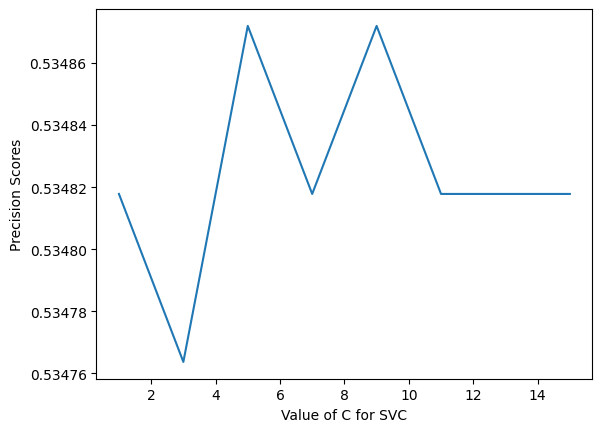

In [ ]:
# plt.xticks(np.arange(0,10))
plt.ylabel('Precision Scores')
plt.xlabel('Value of C for SVC')
plt.plot(C_range[:len(model_f1s)],model_f1s)

In [ ]:
svc = SVC(kernel="poly")
scores = cross_validate(svc, X, y, cv=10, scoring='precision')
print(f"SVM with 'poly' kernel has a mean precision of {scores['test_score'].mean()}")